In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

## Data preprocessing

In [4]:
data = pd.read_csv('credit_score.csv')
data.head(5)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [5]:
data.shape

(1000, 10)

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,499.500,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,35.546,11.375469,19.0,27.00,33.0,42.00,75.0
Job,1000.0,1.904,0.653614,0.0,2.00,2.0,2.00,3.0
Credit amount,1000.0,3271.258,2822.736876,250.0,1365.50,2319.5,3972.25,18424.0
Duration,1000.0,20.903,12.058814,4.0,12.00,18.0,24.00,72.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


In [8]:
data.nunique()

Unnamed: 0          1000
Age                   53
Sex                    2
Job                    4
Housing                3
Saving accounts        4
Checking account       3
Credit amount        921
Duration              33
Purpose                8
dtype: int64

#### Check for missed data and fill it

In [9]:
data['Saving accounts'] = data['Saving accounts'].fillna('unk')
data['Checking account'] = data['Checking account'].fillna('unk')
data.head(3)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,unk,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,unk,2096,12,education


#### Make categorial features

In [10]:
categorial_features = ['Sex', 'Housing', 'Checking account', 'Purpose']
order = [['unk', 'little', 'moderate', 'quite rich', 'rich']]

#### Code categorial data to numeric vectors for model implementation

In [11]:
oe = OrdinalEncoder(categories=order)
data['Saving accounts'] = oe.fit_transform(data[['Saving accounts']])

In [12]:
ohe = OneHotEncoder(handle_unknown='ignore')
encoded = ohe.fit_transform(data[categorial_features]).toarray()

In [13]:
encoded_data = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(categorial_features))
data = pd.concat([data, encoded_data], axis=1).drop(categorial_features, axis=1)
data.head(7)

,Unnamed: 0,Age,Job,Saving accounts,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,...,Checking account_rich,Checking account_unk,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,0,67,2,0.0,1169,6,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,22,2,1.0,5951,48,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,49,1,1.0,2096,12,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,45,2,1.0,7882,42,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,53,2,1.0,4870,24,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,35,1,0.0,9055,36,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,6,53,2,3.0,2835,24,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Let's look at age, credit amount, credit duration distribution and features correlation

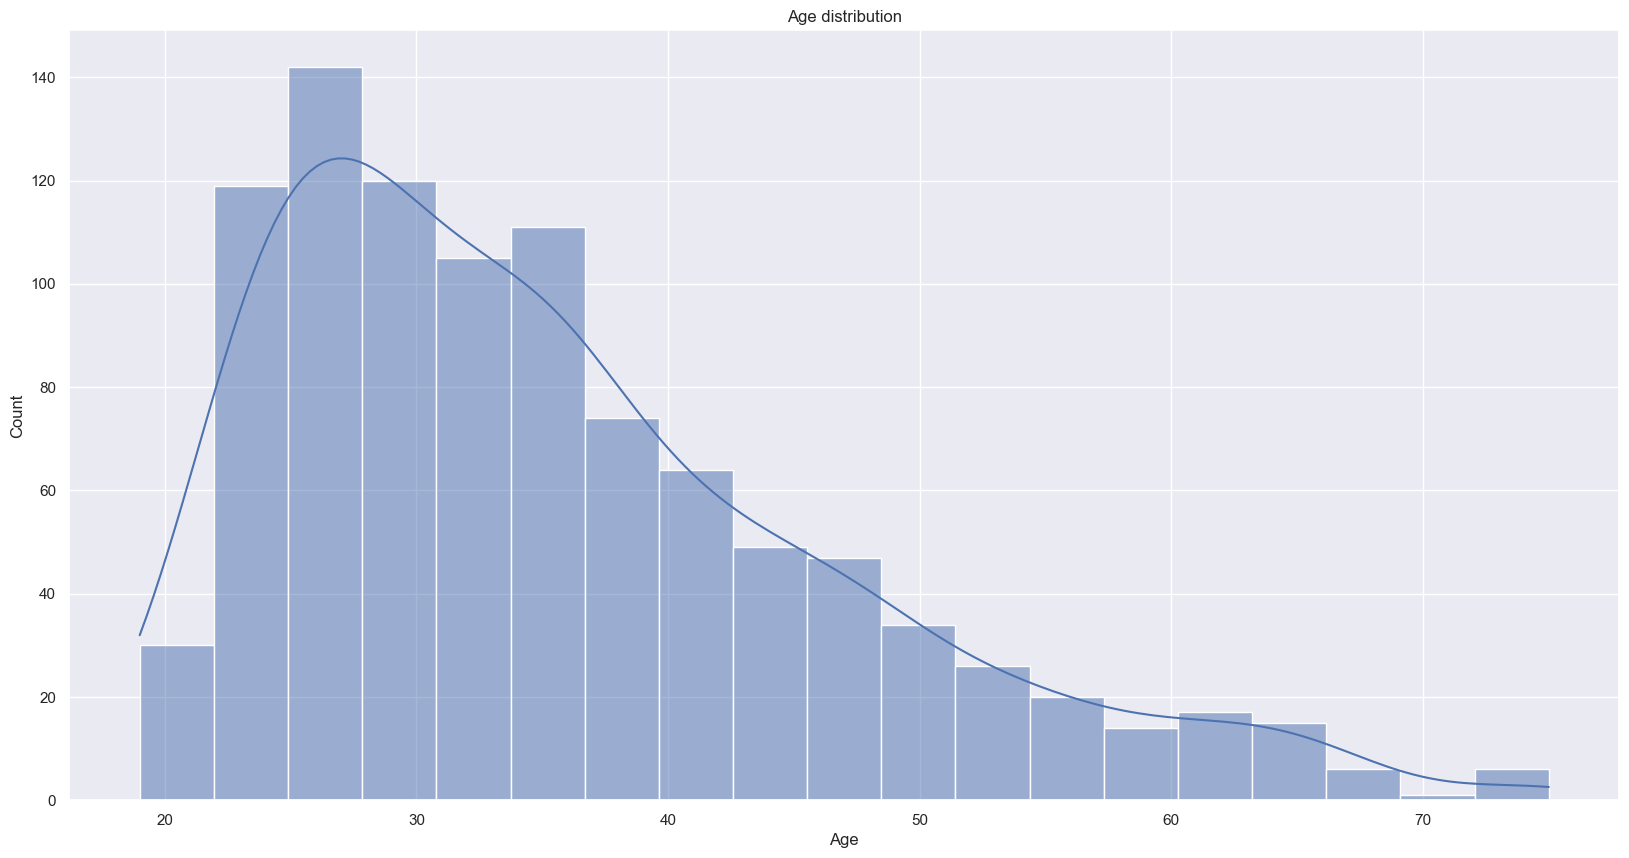

In [19]:
sns.histplot(data['Age'], kde=True)
plt.title('Age distribution')
plt.show()

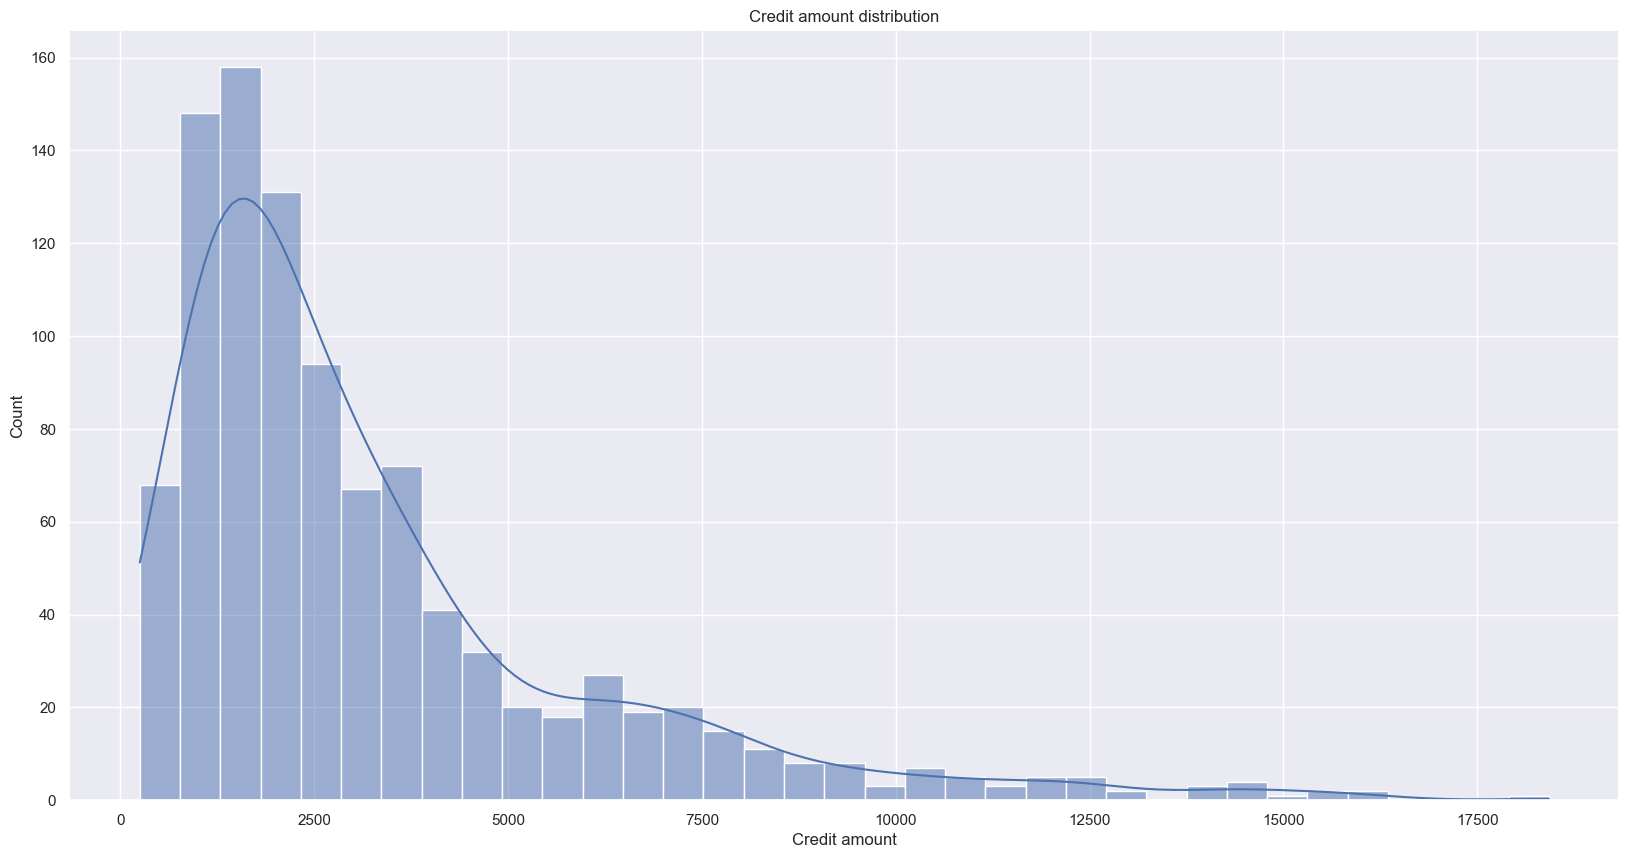

In [20]:
sns.histplot(data['Credit amount'], kde=True)
plt.title('Credit amount distribution')
plt.show()

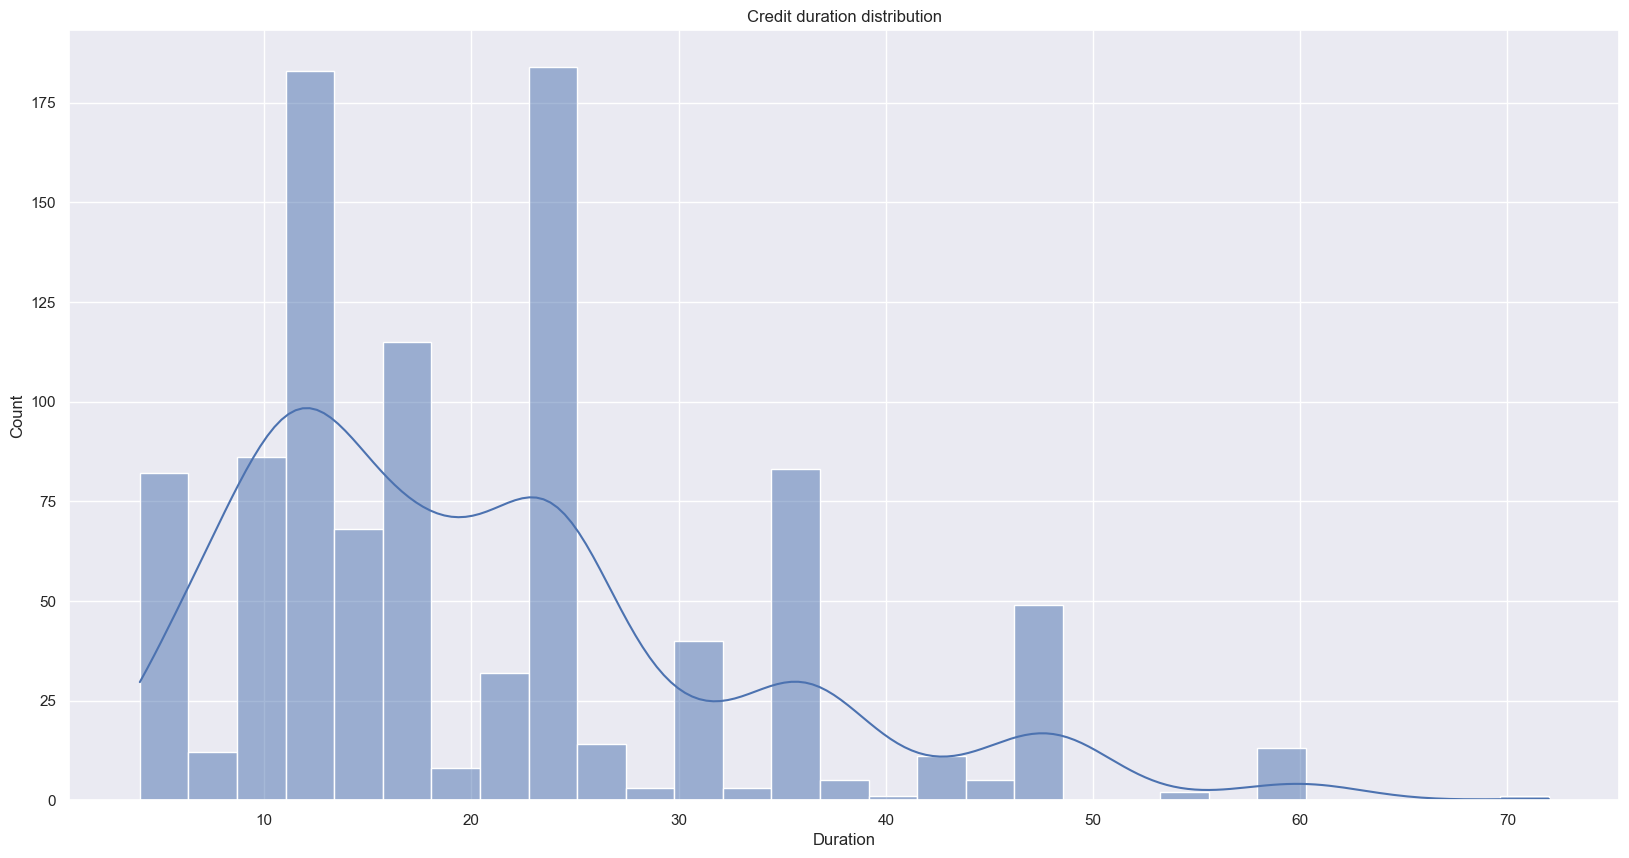

In [21]:
sns.histplot(data['Duration'], kde=True)
plt.title('Credit duration distribution')
plt.show()

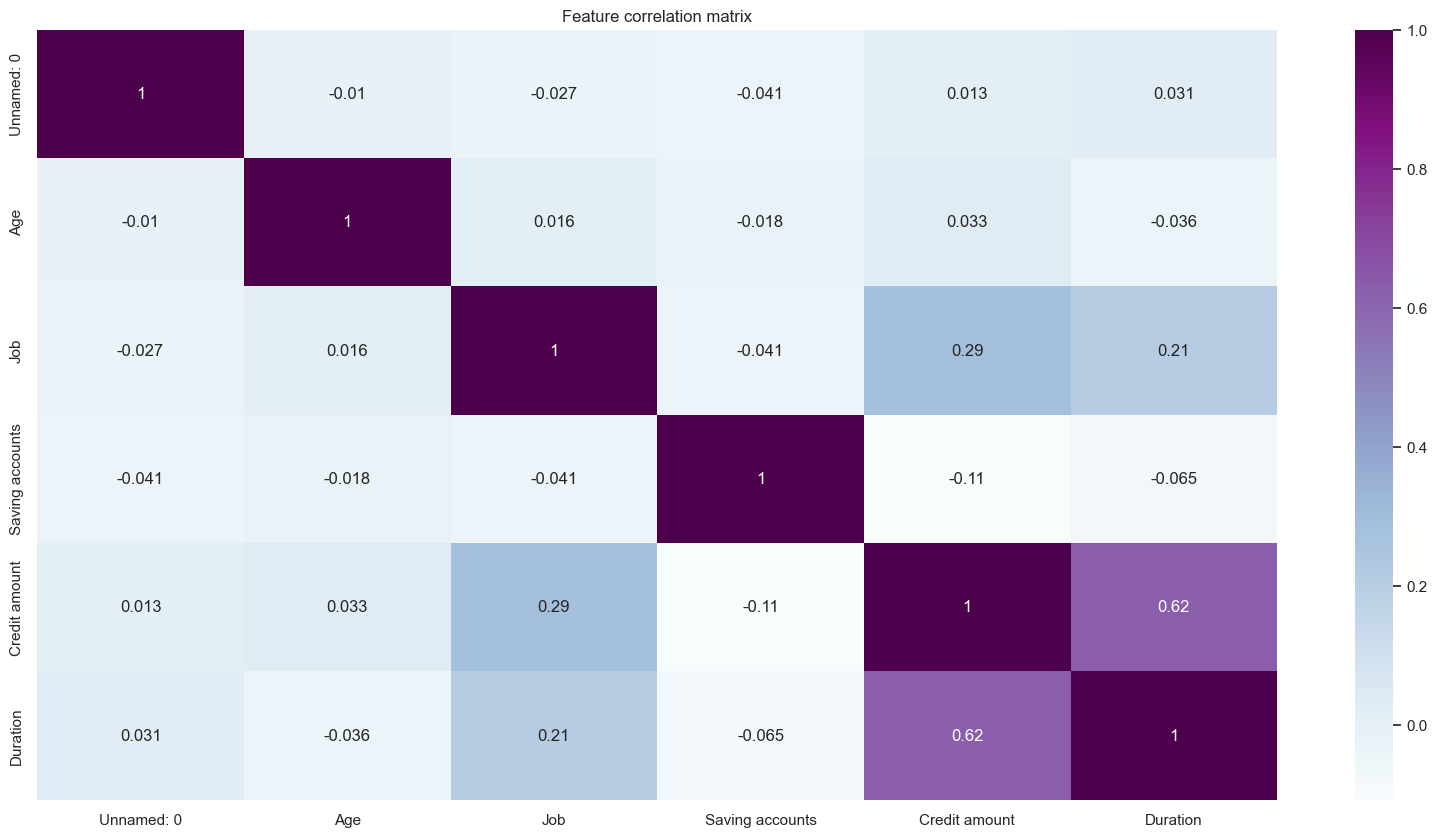

In [25]:
data_corr = data.drop(columns = ohe.get_feature_names_out(categorial_features))
plt.figure(figsize=(20, 10))
sns.heatmap(data_corr.corr(), annot=True, cmap='BuPu')
plt.title('Feature correlation matrix')
plt.show()

## Divide to features and targets

In [28]:
X = data.drop(columns=['Credit amount'])
y = data['Credit amount'] > data['Credit amount'].median()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

scaler = StandardScaler()

In [29]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)